In [178]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
plt.style.use(['fivethirtyeight'])
sns.set(font_scale = 1)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
np.random.seed(42)

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D

In [179]:
import pandas as pd
data = pd.read_csv("Telco_Customer_Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [180]:
display(data.shape, data.head(5))


(7043, 21)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [181]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [182]:
data_info = pd.DataFrame(columns=['Name of Col', 'Num of Null', 'Dtype', 'N_Unique'])

for i in range(0, len(data.columns)):
    data_info.loc[i] = [data.columns[i],
                        data[data.columns[i]].isnull().sum(),
                        data[data.columns[i]].dtypes,
                        data[data.columns[i]].nunique()]

data_info

,Name of Col,Num of Null,Dtype,N_Unique
0,customerID,0,object,7043
1,gender,0,object,2
2,SeniorCitizen,0,int64,2
3,Partner,0,object,2
4,Dependents,0,object,2
5,tenure,0,int64,73
6,PhoneService,0,object,2
7,MultipleLines,0,object,3
8,InternetService,0,object,3
9,OnlineSecurity,0,object,3


In [183]:
#data.drop(columns='CUST_ID', inplace=True)
df = data
df.drop(columns = 'Churn', inplace = True)
df.drop(columns = 'customerID', inplace = True)
df['TotalCharges'].str.replace(',', '')

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [184]:
df['TotalCharges'].str.strip()
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].astype('float64')


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


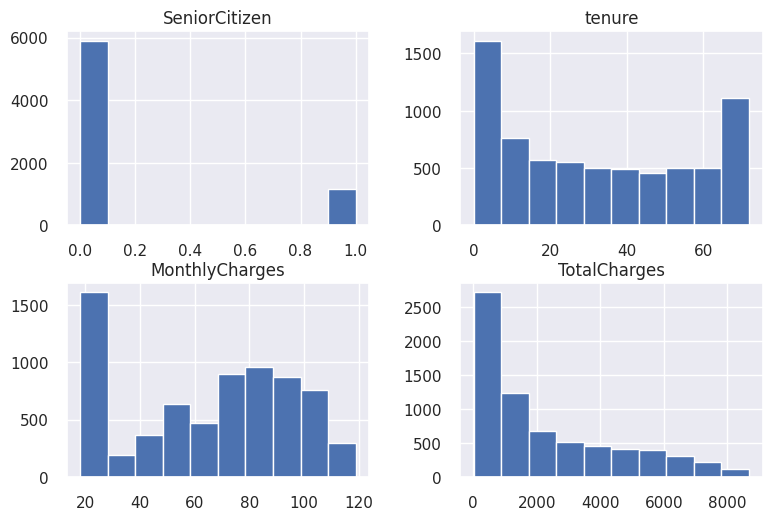

In [185]:
print(df.columns)
cdf = df[df.columns]

viz = cdf [df.columns]
viz.hist(),

plt.show()


In [186]:
i = 1
for col in df.columns:
  if data[col].dtypes == object:
      print(i,".",col,"    = ", df[col].unique(),"\n")
      i = i + 1


1 . gender     =  ['Female' 'Male'] 

2 . Partner     =  ['Yes' 'No'] 

3 . Dependents     =  ['No' 'Yes'] 

4 . PhoneService     =  ['No' 'Yes'] 

5 . MultipleLines     =  ['No phone service' 'No' 'Yes'] 

6 . InternetService     =  ['DSL' 'Fiber optic' 'No'] 

7 . OnlineSecurity     =  ['No' 'Yes' 'No internet service'] 

8 . OnlineBackup     =  ['Yes' 'No' 'No internet service'] 

9 . DeviceProtection     =  ['No' 'Yes' 'No internet service'] 

10 . TechSupport     =  ['No' 'Yes' 'No internet service'] 

11 . StreamingTV     =  ['No' 'Yes' 'No internet service'] 

12 . StreamingMovies     =  ['No' 'Yes' 'No internet service'] 

13 . Contract     =  ['Month-to-month' 'One year' 'Two year'] 

14 . PaperlessBilling     =  ['Yes' 'No'] 

15 . PaymentMethod     =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 



In [187]:
data = df
data["gender"].replace({'Female':0, 'Male':1},inplace = True)
data["Partner"].replace({'Yes':0, 'No':1}, inplace = True)
data["Dependents"].replace({'Yes':0, 'No':1}, inplace = True)
data["PhoneService"].replace({'Yes':0, 'No':1}, inplace = True)
data["MultipleLines"].replace({'Yes':0, 'No':1,'No phone service': 2}, inplace = True)
data["InternetService"].replace({'DSL':0,'Fiber optic':2, 'No':1}, inplace = True)
data["OnlineSecurity"].replace({'Yes':0, 'No':1, 'No internet service': 2}, inplace = True)
data["OnlineBackup"].replace({'Yes':0, 'No':1,'No internet service': 2}, inplace = True)
data["DeviceProtection"].replace({'Yes':0, 'No':1,'No internet service': 2}, inplace = True)
data["TechSupport"].replace({'Yes':0, 'No':1,'No internet service': 2}, inplace = True)
data["StreamingTV"].replace({'Yes':0, 'No':1,'No internet service': 2}, inplace = True)
data["StreamingMovies"].replace({'Yes':0, 'No':1,'No internet service': 2}, inplace = True)
data["Contract"].replace({'Month-to-month':0, 'One year':1, 'Two year':2}, inplace = True)
data["PaperlessBilling"].replace({'Yes':0, 'No':1}, inplace = True)
data["PaymentMethod"].replace({'Electronic check':0, 'Mailed check':1, 'Bank transfer (automatic)':2, 'Credit card (automatic)':3}, inplace = True)
# data.drop("Car_Name", axis=1, inplace = True)

data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,1,1,1,2,0,1,0,1,1,1,1,0,0,0,29.85,29.85
1,1,0,1,1,34,0,1,0,0,1,0,1,1,1,1,1,1,56.95,1889.50
2,1,0,1,1,2,0,1,0,0,0,1,1,1,1,0,0,1,53.85,108.15
3,1,0,1,1,45,1,2,0,0,1,0,0,1,1,1,1,2,42.30,1840.75
4,0,0,1,1,2,0,1,2,1,1,1,1,1,1,0,0,0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,0,24,0,0,0,0,1,0,0,0,0,1,0,1,84.80,1990.50
7039,0,0,0,0,72,0,0,2,1,0,0,1,0,0,1,0,3,103.20,7362.90
7040,0,0,0,0,11,1,2,0,0,1,1,1,1,1,0,0,0,29.60,346.45
7041,1,1,0,1,4,0,0,2,1,1,1,1,1,1,0,0,1,74.40,306.60


<Axes: >

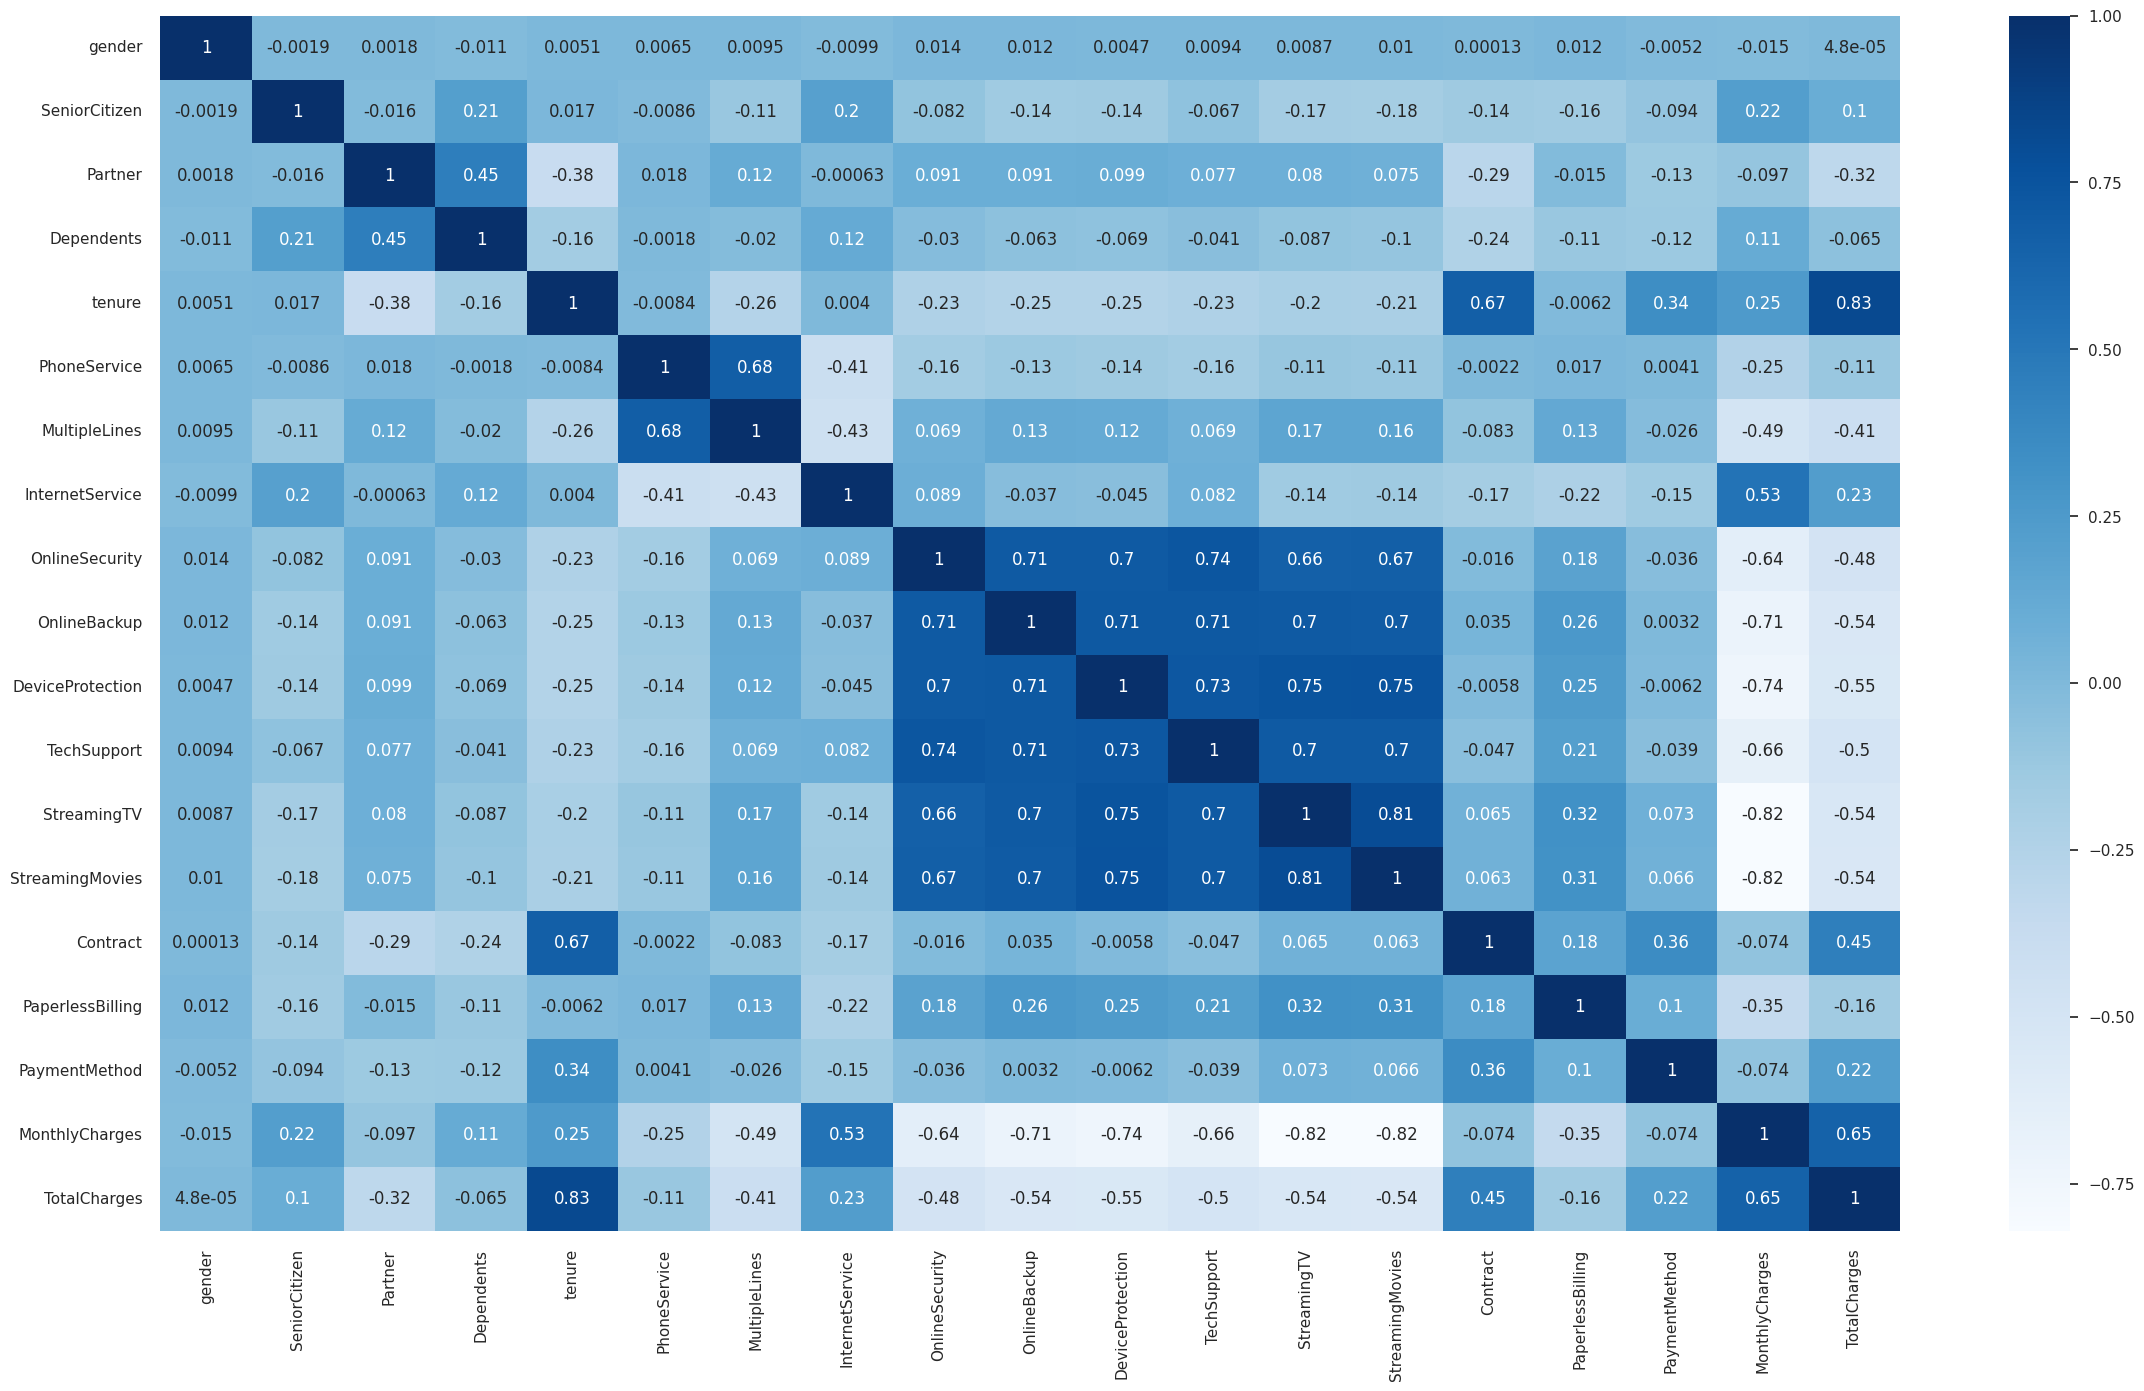

In [188]:
plt.figure(figsize=(25,15))
sns.heatmap( data.corr(), annot=True, cmap='Blues')

In [189]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()

data= pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

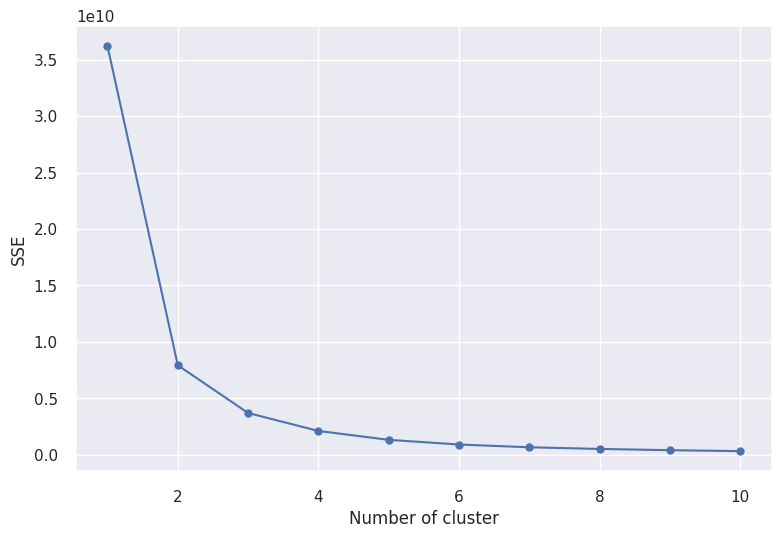

In [190]:
n_clusters = 10

inertias = []

for n_cluster in range(1 , n_clusters+1):

    kmean= KMeans(n_cluster, random_state=0)

    kmean.fit(data)

    inertias.append(kmean.inertia_)

plt.plot(range(1 , n_clusters+1), inertias, '-o')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


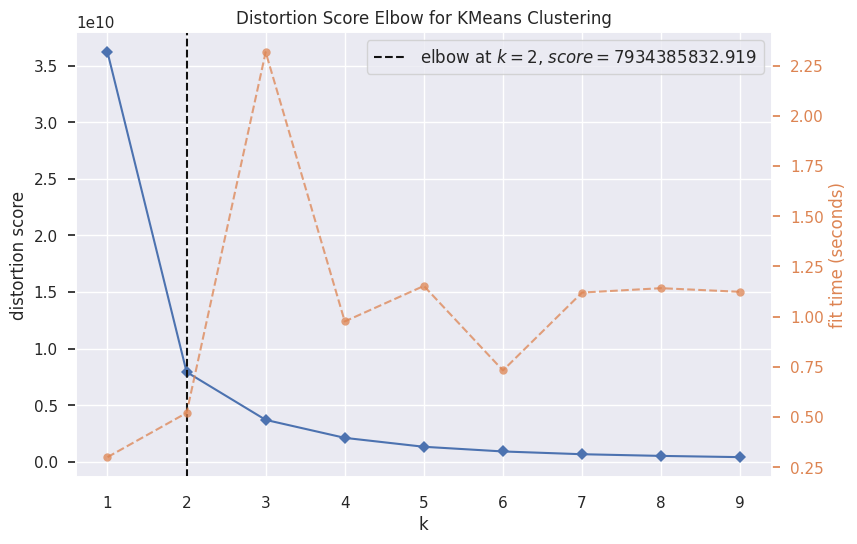

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [191]:
kmeans = KMeans(n_clusters=2, random_state=0)

vis_elbow = KElbowVisualizer(kmeans, k = (1, 10))
vis_elbow.fit(data)
vis_elbow.poof()

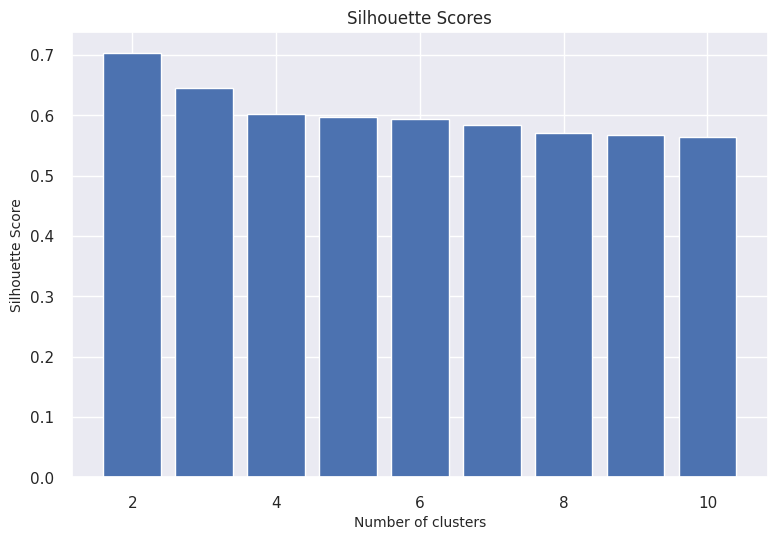

In [192]:
silhouette_scores = []

for n_cluster in range(2 , n_clusters+1):

  kmeans = KMeans(n_cluster, random_state=0)

  labels = kmeans.fit_predict(data)

  silhouette_scores.append(silhouette_score(data, labels))

plt.bar(range(2 , n_clusters+1), silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette Score', fontsize = 10)
plt.title('Silhouette Scores')
plt.show()

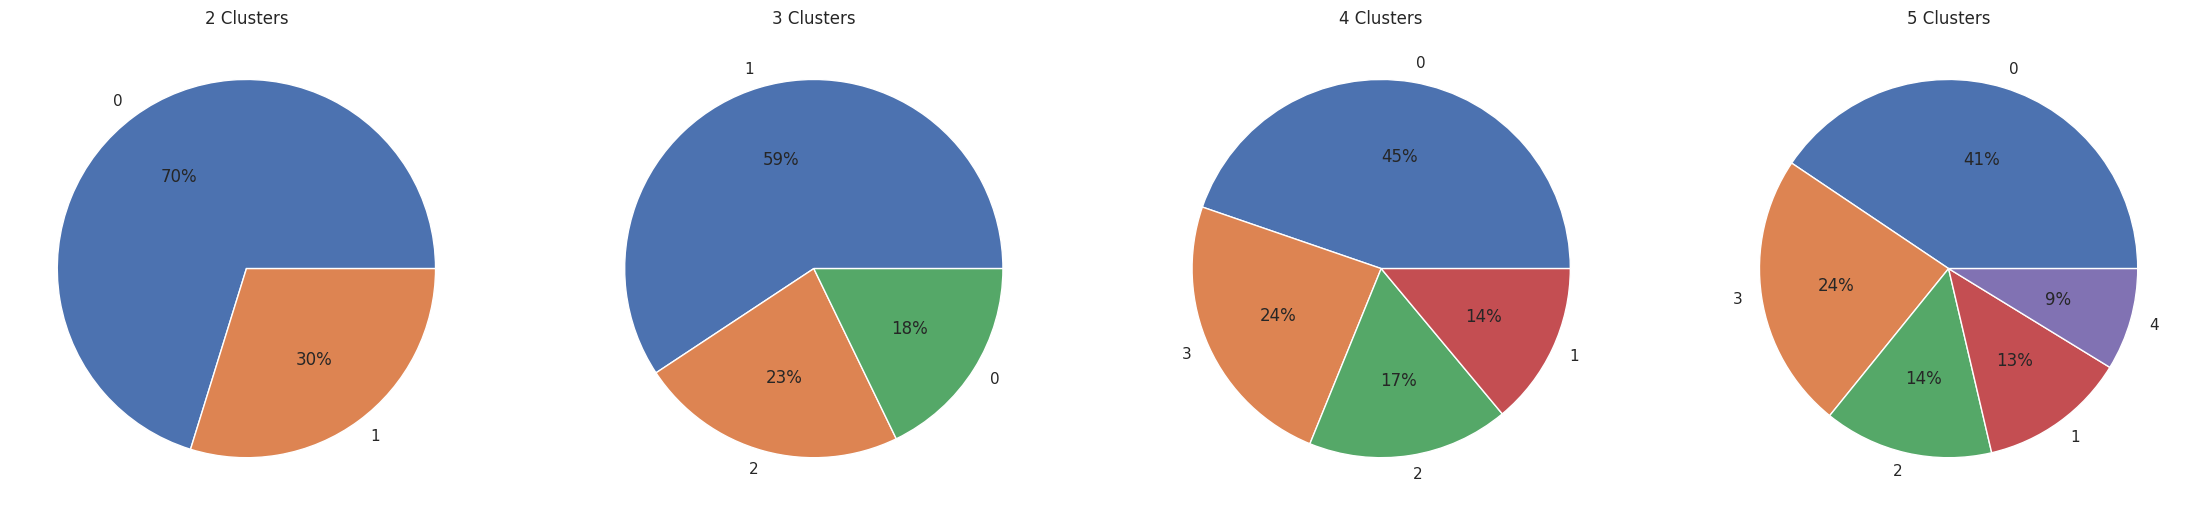

In [193]:
plt.figure(figsize=(25,25))

for i, n_cluster in enumerate(range(2,6)):

  kmeans = KMeans(n_clusters=n_cluster, random_state=0)

  labels = kmeans.fit_predict(data)

  labels = pd.Series(labels)

  ax = plt.subplot(1 , 4, i+1)

  ax.set_title(f"{n_cluster} Clusters")

  labels.value_counts().plot.pie(autopct='%1.0f%%', ax = ax)

In [194]:
kmeans = KMeans(n_clusters=4, random_state=0)

df["Clusters"] =kmeans.fit_predict(data)

df["Clusters"] = df["Clusters"].astype('category')

df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Clusters
0,0,0,0,1,1,1,2,0,1,0,1,1,1,1,0,0,0,29.85,29.85,0
1,1,0,1,1,34,0,1,0,0,1,0,1,1,1,1,1,1,56.95,1889.50,3
2,1,0,1,1,2,0,1,0,0,0,1,1,1,1,0,0,1,53.85,108.15,0
3,1,0,1,1,45,1,2,0,0,1,0,0,1,1,1,1,2,42.30,1840.75,3
4,0,0,1,1,2,0,1,2,1,1,1,1,1,1,0,0,0,70.70,151.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,0,24,0,0,0,0,1,0,0,0,0,1,0,1,84.80,1990.50,3
7039,0,0,0,0,72,0,0,2,1,0,0,1,0,0,1,0,3,103.20,7362.90,1
7040,0,0,0,0,11,1,2,0,0,1,1,1,1,1,0,0,0,29.60,346.45,0
7041,1,1,0,1,4,0,0,2,1,1,1,1,1,1,0,0,1,74.40,306.60,0


<Figure size 2000x3500 with 0 Axes>

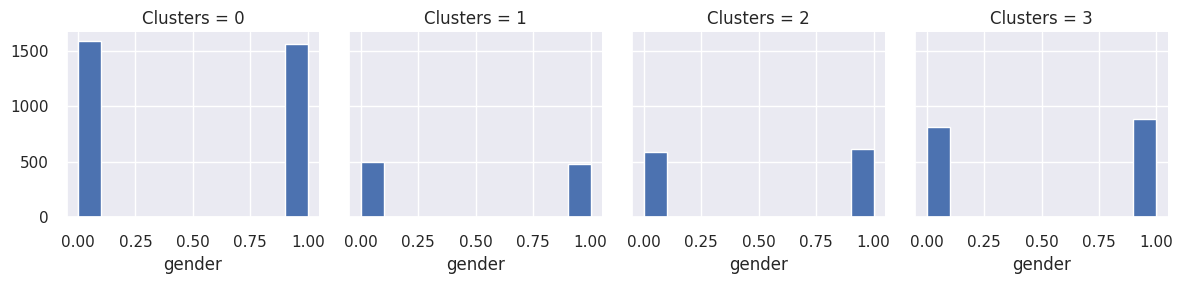

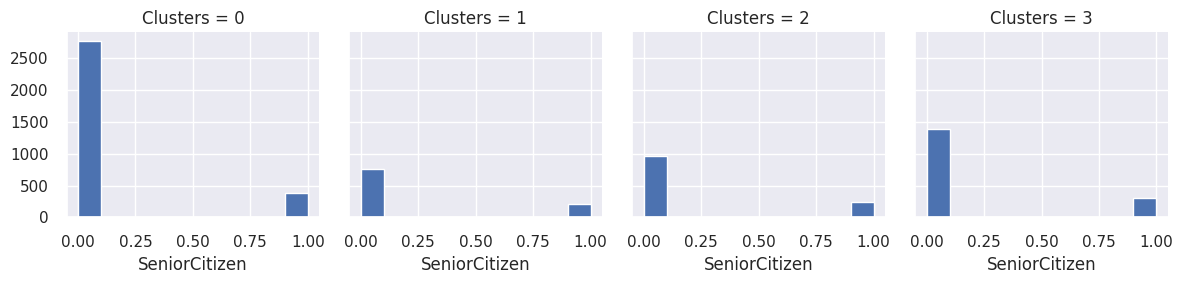

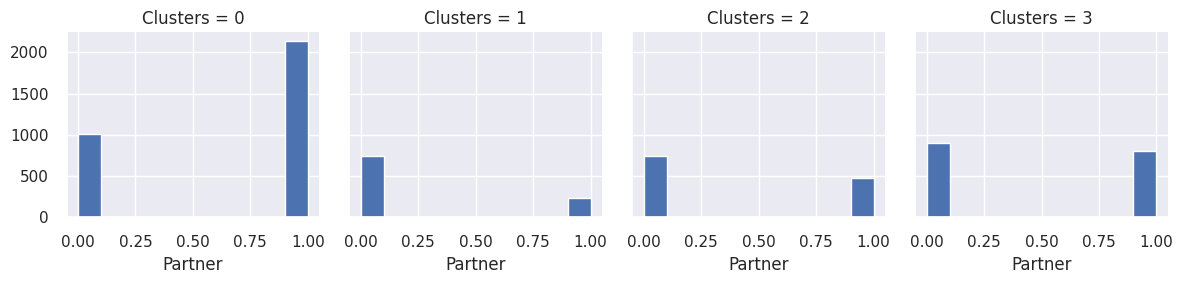

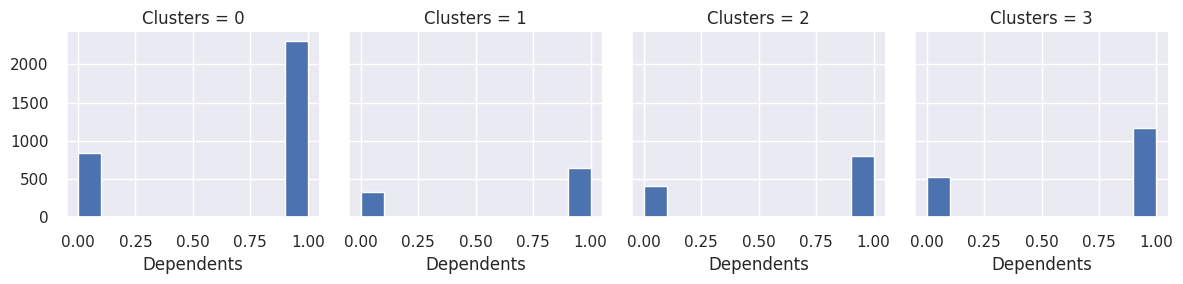

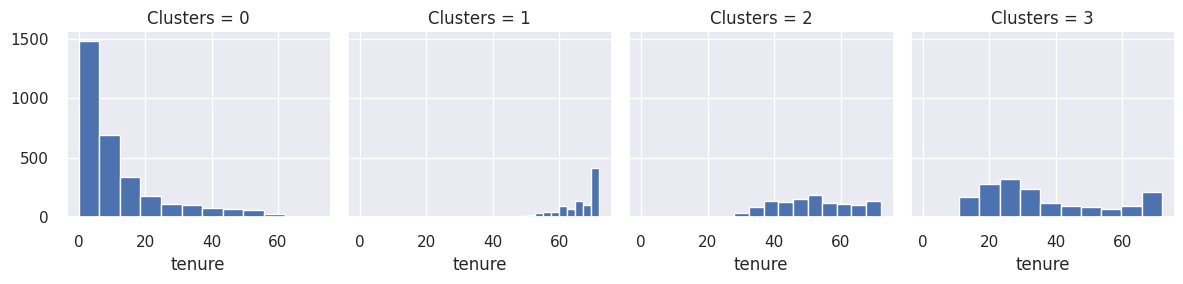

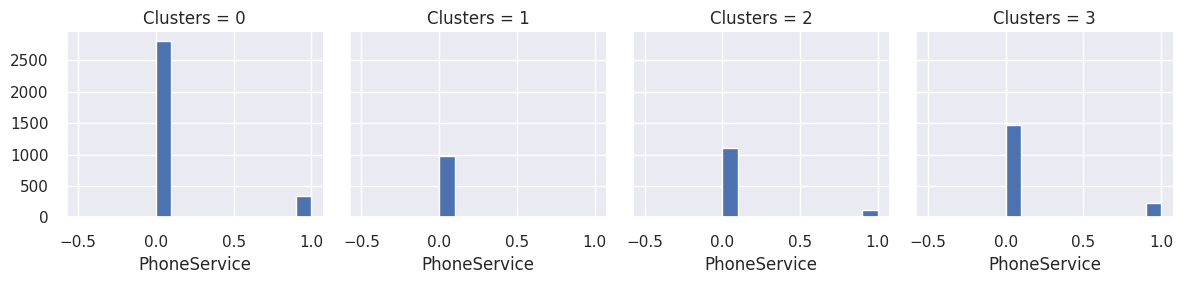

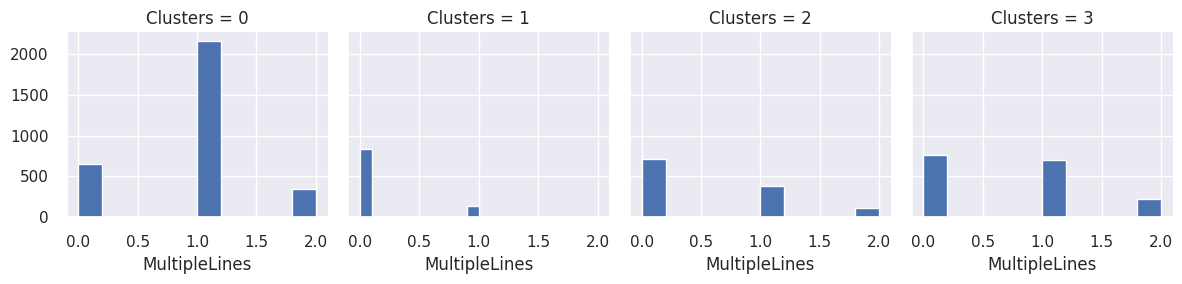

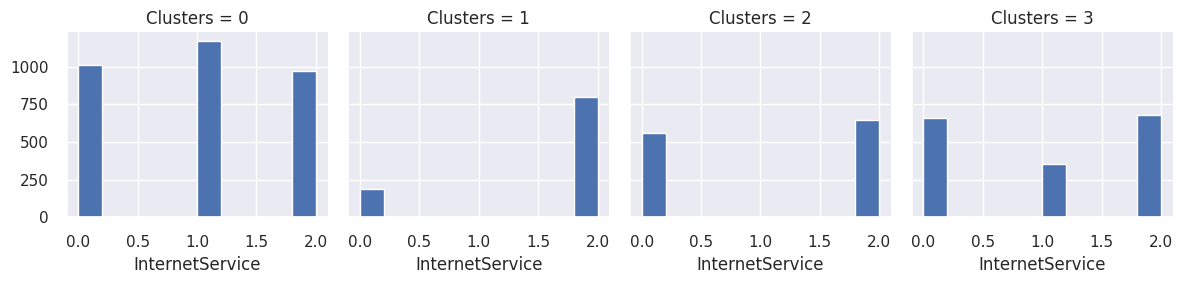

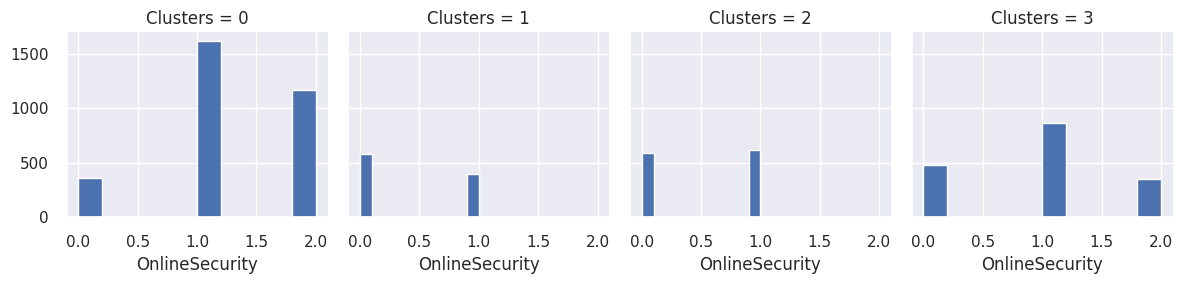

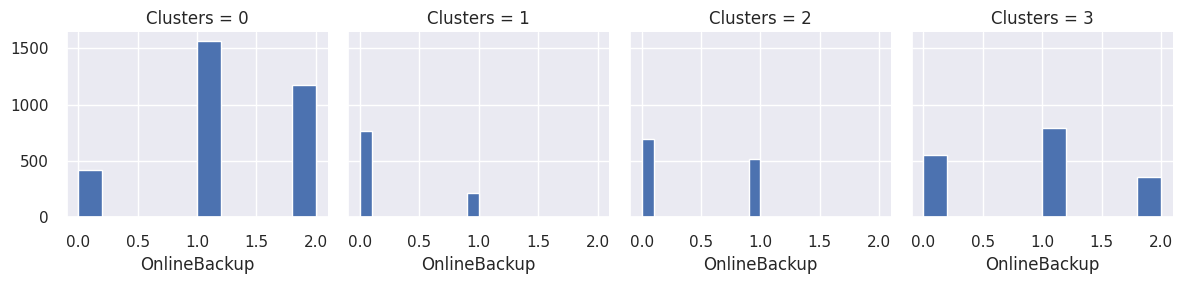

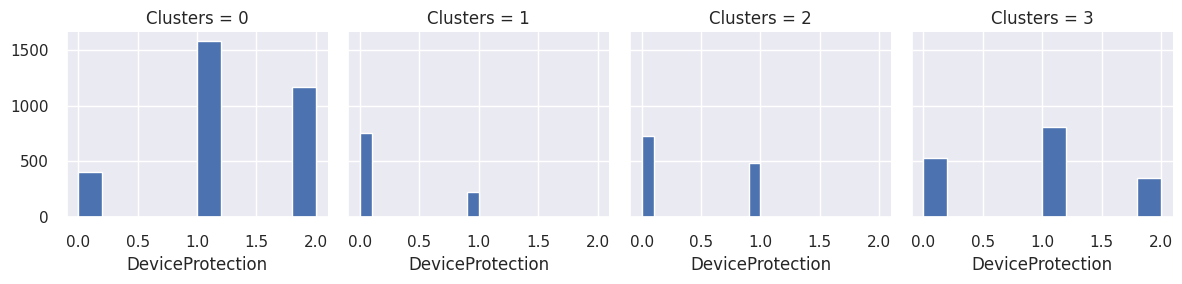

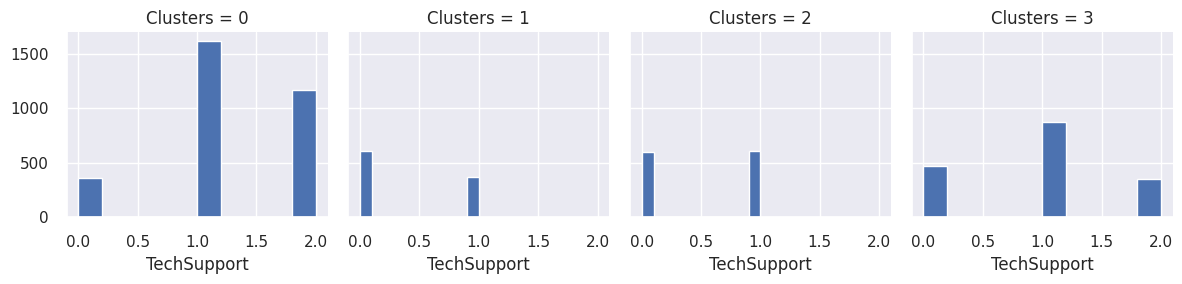

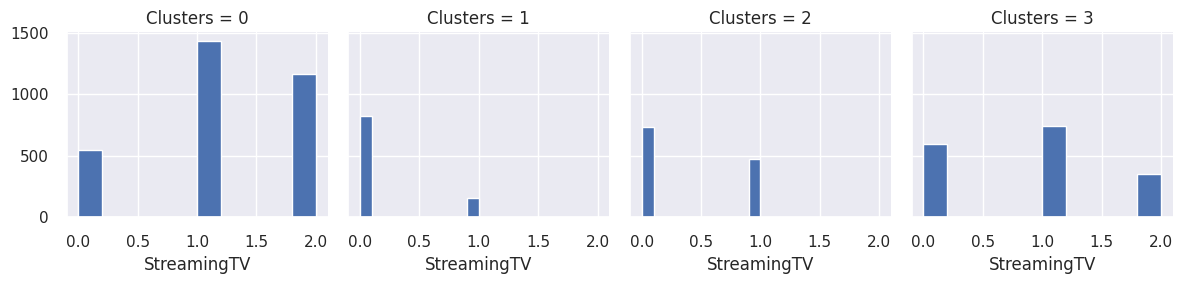

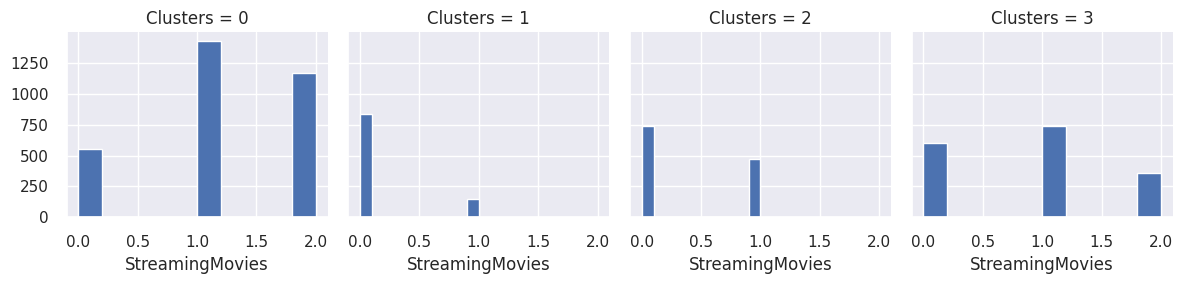

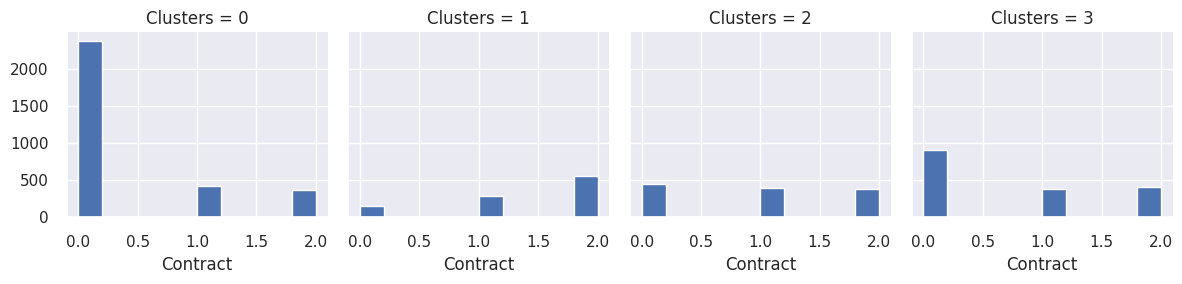

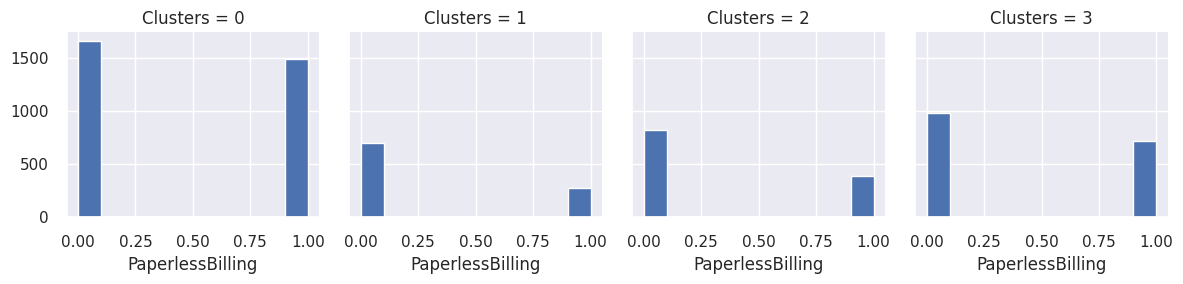

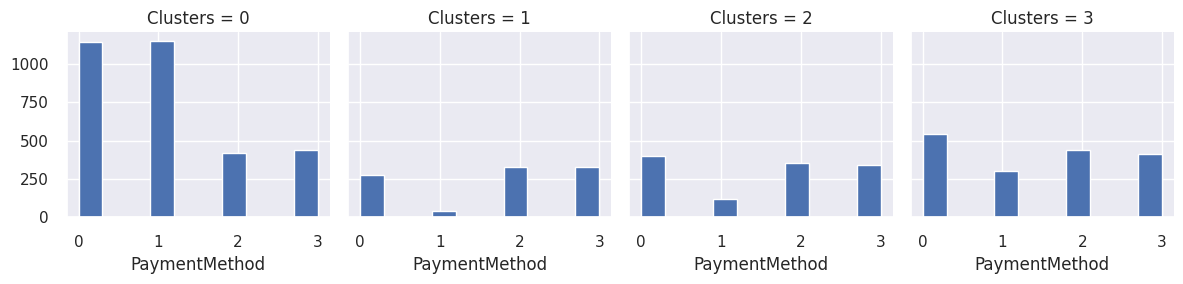

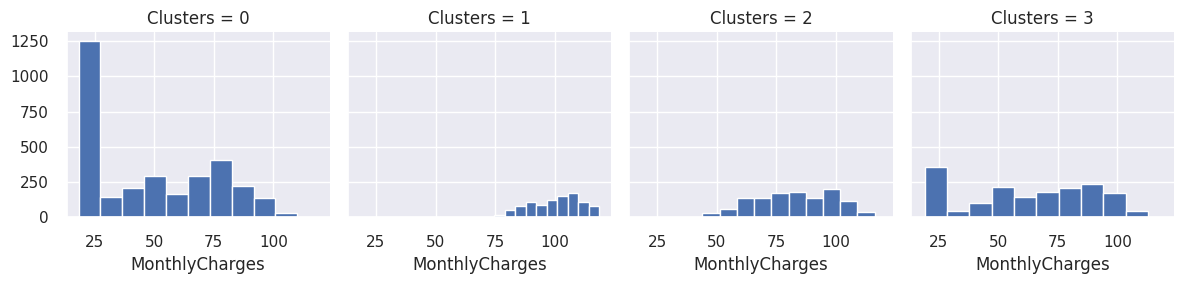

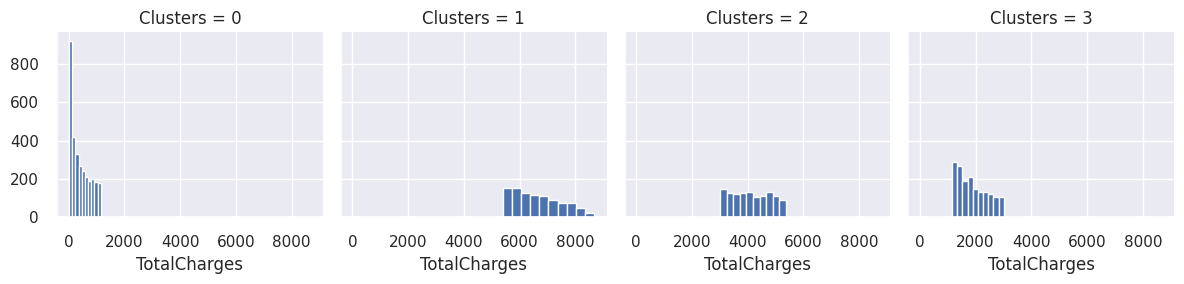

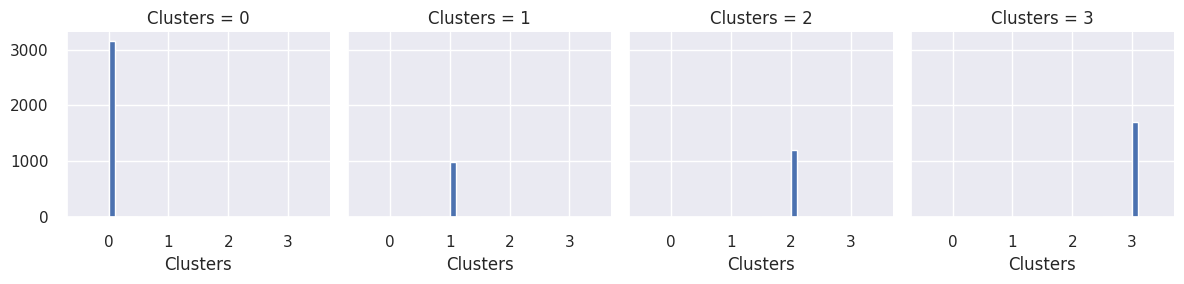

In [195]:
plt.figure(figsize=(20,35))

for col in df.columns:

    grid = sns.FacetGrid(df, col='Clusters')

    grid.map(plt.hist, col)

    plt.show()

In [199]:
df.groupby('Clusters')['MonthlyCharges'].describe()

,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,3150.0,48.182079,26.640679,18.25,20.350,45.400,73.75,110.10
1,982.0,100.285540,10.506248,74.55,91.725,102.625,108.75,118.75
2,1212.0,82.396700,16.337375,43.90,69.825,82.725,95.70,116.25
3,1699.0,62.388376,26.781184,19.10,40.200,65.000,85.35,112.95


In [209]:
fresh_data = df
df.dropna(inplace=True)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(fresh_data.drop('Clusters',axis=1))
scaled=sc.transform(fresh_data.drop('Clusters',axis=1))
final=pd.DataFrame(scaled,columns=fresh_data.columns[:-1])

In [210]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final,fresh_data['Clusters'], test_size=0.2, random_state=101)

In [211]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier

In [212]:
from sklearn.model_selection import train_test_split

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   int64   
 1   SeniorCitizen     7032 non-null   int64   
 2   Partner           7032 non-null   int64   
 3   Dependents        7032 non-null   int64   
 4   tenure            7032 non-null   int64   
 5   PhoneService      7032 non-null   int64   
 6   MultipleLines     7032 non-null   int64   
 7   InternetService   7032 non-null   int64   
 8   OnlineSecurity    7032 non-null   int64   
 9   OnlineBackup      7032 non-null   int64   
 10  DeviceProtection  7032 non-null   int64   
 11  TechSupport       7032 non-null   int64   
 12  StreamingTV       7032 non-null   int64   
 13  StreamingMovies   7032 non-null   int64   
 14  Contract          7032 non-null   int64   
 15  PaperlessBilling  7032 non-null   int64   
 16  PaymentMethod     7032 n

In [214]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 2)
drugTree
drugTree.fit(x_train,y_train) # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [216]:
predTree = drugTree.predict(x_test)

In [218]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.8592750533049041
